In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [4]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [64]:
chirps = df['Chirps/Second'].values
temps = df[['Ground Temperature']].values
temps

array([[ 88.6],
       [ 71.6],
       [ 93.3],
       [ 84.3],
       [ 80.6],
       [ 75.2],
       [ 69.7],
       [ 71.6],
       [ 69.4],
       [ 83.3],
       [ 79.6],
       [ 82.6],
       [ 80.6],
       [ 83.5],
       [ 76.3]])

In [97]:
regression = linear_model.LinearRegression()
regression.fit(temps, chirps)
score = regression.score(temps, chirps)
# regression.fit(np.array(medical_care.index.values).reshape((-1, 1)), 
#                medical_care.mean_minutes.values)

In [103]:
coef, intercept = regression.coef_, regression.intercept_
chirps_t = 'chirps/s = {}oF + {}'.format(coef, intercept)
chirps_t

'chirps/s = [ 0.20299973]oF + 0.4593146452359598'

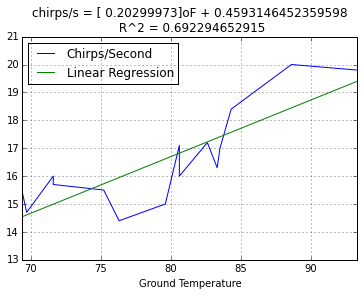

In [101]:
df.set_index('Ground Temperature').sort_index().plot(kind='line')
fn = lambda x: regression.predict(x)[0]
xs = np.linspace(65, 100, 100)
plt.plot(xs, [fn(x) for x in xs], label='Linear Regression')
plt.legend(loc=2)
plt.title(chirps_t + '\n R^2 = ' + str(score))


Not a great fit -- only 0.69 R-squared value.

In [112]:
def extrapolate(temp_F):
    return float(coef*temp_F + intercept)

def interpolate(chirps_s):
    return float((chirps_s - intercept) / coef)

In [113]:
extrapolate(95)

19.744289128968745

In [114]:
interpolate(18)

86.40743134548568

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [115]:
df = pd.read_fwf("brain_body.txt")

In [162]:
d = df.set_index('Brain')
brains = d.index.values
body = d[['Body']].values
brains_g = 'brains_g = {}g-body + {}g'.format(coef, intercept)


In [163]:
regression = linear_model.LinearRegression()
regression.fit(body, brains)
coef, intercept = regression.coef_, regression.intercept_
score = regression.score(body, brains)

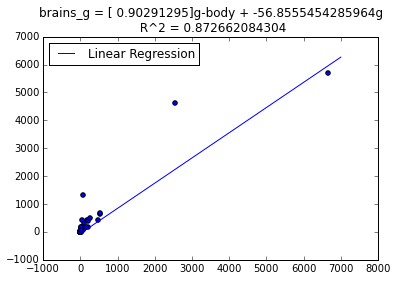

In [166]:
plt.scatter(x=brains, y=body)

fn = lambda x: regression.predict(x)[0]
xs = np.linspace(0, 7000, 100)
plt.plot(xs, [fn(x) for x in xs], label='Linear Regression')
plt.legend(loc=2)
plt.title(brains_g + '\n R^2 = ' + str(score))


In [167]:
plt.show()

###The fit score is high, but the large number of points for smaller animals is dominating the regression.  Better results for both large and small animals would likely be achieved by making the two groups separate.

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [169]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [173]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [180]:
d = df.loc[:, [
               'Rank',
               'Year',
               'Degree',
               'YSdeg',
               'Salary'
               ]]
# df.dropna(inplace=True)
feature_vector = d[[
                  'Rank',
                  'Year',
                  'Degree',
                  'YSdeg']]
salary = d['Salary']

In [181]:
regr2 = linear_model.LinearRegression()
fit = regr2.fit(feature_vector, salary)
print('Coefficients: \n', regr2.coef_)
print(regr2.score(feature_vector, salary))

Coefficients: 
 [ 5270.22591237   422.39449213  -892.71773473   -84.28239939]
0.848507720434


In [182]:
d = df.loc[:, ['Sex',
               'Rank',
               'Year',
               'Degree',
               'YSdeg',
               'Salary'
               ]]
# df.dropna(inplace=True)
feature_vector = d[['Sex',
                  'Rank',
                  'Year',
                  'Degree',
                  'YSdeg']]
salary = d['Salary']

In [183]:
regr2 = linear_model.LinearRegression()
fit = regr2.fit(feature_vector, salary)
print('Coefficients: \n', regr2.coef_)
print(regr2.score(feature_vector, salary))

Coefficients: 
 [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354]
0.854718067441


In [187]:
import itertools
dependent_vars = list(df.columns)
dependent_vars.remove('Salary')
combos = list(itertools.combinations(dependent_vars, 5))

In [250]:

def regression_for(combo):
    combo = list(combo)
    d = df.loc[:, combo + ['Salary']]
#     df.dropna(inplace=True)
    input_data = df[combo]
    salary = df['Salary']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, salary)
    return regr, regr.score(input_data, salary)

def test_regression(combos):
    choices = []
    for combo in combos:
        regr, score = regression_for(combo)
        choices.append((combo, score))

    best = sorted(choices, key=lambda x: x[1])[-1]
    #print(best)
    regr, score = regression_for(best[0])
    #print(regr.coef_, regr.intercept_)
    return best

def best_regression(n):
    scores = []
    for i in range(1, n+1):
        scores.append(test_regression(list(itertools.combinations(dependent_vars, i))))
    return scores

In [251]:
best_regression(5)

[(('Rank',), 0.75253605392746314),
 (('Rank', 'Year'), 0.84364809332645985),
 (('Rank', 'Year', 'YSdeg'), 0.84567257644855964),
 (('Sex', 'Rank', 'Year', 'YSdeg'), 0.84903661922628515),
 (('Sex', 'Rank', 'Year', 'Degree', 'YSdeg'), 0.85471806744109691)]

###Gender has a slight effect, when taken with all 4 other factors